In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

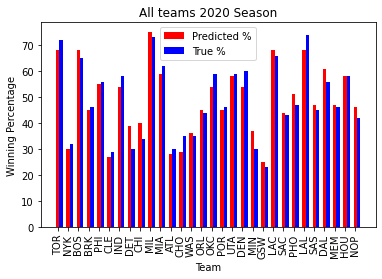

In [2]:
os.chdir('./grandTeamLogs/20')
team_code = ['TOR','NYK','BOS','BRK','PHI','CLE','IND','DET','CHI','MIL','MIA','ATL','CHO','WAS','ORL','OKC','POR','UTA','DEN','MIN','GSW','LAC','SAC','PHO','LAL','SAS','DAL','MEM','HOU','NOP']
team_prediction = [0 for i in range(0,30)]
team_result = [0 for i in range(0,30)]

def pythagorean_expectation(scored, allowed):
    return round((scored**13.91/(allowed**13.91+scored**13.91))*100)

for code in team_code:
    df = pd.read_csv('2020-' + code + '.csv')
    pts_scored = sum(df.pts)
    pts_allowed = sum(df.opp_pts)
    result = pythagorean_expectation(pts_scored, pts_allowed)
    team_prediction[team_code.index(code)] = result
    if df['wins'].iloc[-1] != df['wins'].max():
        team_result[team_code.index(code)] = round(((df['wins'].iloc[-1]+df['wins'].max())/df.shape[0])*100)
    else:
        team_result[team_code.index(code)] = round((df['wins'].iloc[-1]/df.shape[0])*100)
ypos = np.arange(0,3*len(team_code),3)
ypos2 = [i+1 for i in ypos]
fig, ax = plt.subplots()
plt.xticks(ypos, team_code)
ax.bar(ypos, team_prediction,width=1,color='r',label="Predicted %")
ax.bar(ypos2, team_result,width=1,color='b',label="True %")
ax.set_xlabel('Team')
ax.set_ylabel('Winning Percentage')
plt.title('All teams 2020 Season')
ax.legend()
plt.xticks(rotation=90)
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.17)
plt.show()
fig.savefig('foo.pdf')